In [9]:
import json
import os
import re
import urllib.request
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# 1) 네이버 뉴스 수집 시스템 활용하기 0402 하청빈
def add_news_data(start,encText,newslist):
    client_id = "YQcAwB7WJ9mb51YqJmca"
    client_secret = "8GXsEOMWDJ"
    url = f"https://openapi.naver.com/v1/search/news?display=100&{start}&query={encText}" # JSON 결과
    # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read().decode("utf-8")
        response_json = json.loads(response_body)
        nextStart = response_json['display'] + start
        newsitem = response_json['items']
        newslist.extend(newsitem)
        return nextStart,newslist
    else:
        print("Error Code:" + rescode)

In [11]:
# 2) 1000건의 정보 검색을 수행 0402 하청빈
inputed = input("검색할 단어")
encText = urllib.parse.quote(inputed)
start = 1
news_list = list()
while(start<=901):
    start,news_list = add_news_data(start, encText, news_list)
print(inputed)
print(news_list.__len__())

주식
1000


In [12]:
# 3) 검색된 정보에서 내용(description)을 추출하여 하나의 문자열로 결합한다. 0402 하청빈
news_description_join = ','.join([news['description'] for news in news_list])
print(news_description_join)

소버린은 SK㈜ <b>주식</b> 14.99%를 5개 자회사를 통한 지분 쪼개기로 2.99%씩 매입했고, SK㈜는 소버린 측의 이사 선임을 막기 위해 위임장 확보에만 1조원에 달하는 비용을 지출했다. 한 기업 관계자는 &quot;국회 측에 수차례 반대를... ,중견련은 &quot;악화한 상법에 근거한 소송 남발, 경영권 위협 확대는 개별 기업의 가치를 저하하고 산업계 전반의 경쟁력을 크게 훼손할 것&quot;이라며 &quot;정부는 즉각적인 재의요구를 통해 중견기업을 포함한 <b>주식</b>회사 전반의 경영... ,트럼프 대통령이 멕시코와 캐나다에 대한 관세 인상을 연기했음에도 <b>주식</b> 시장은 하락세를 보였으며, 정부의 자금 지원 보류와 공무원 감축 계획도 경제에 부정적인 영향을 미치고 있다. 브랜디와인 글로벌 투자 관리의... ,<b>주식</b> 시장과 달리 가상자산 시장은 시간과 국경에 관계없이 1년 365일, 24시간 거래가 이루어지기에, 대량의 데이터를 원활하게 처리하는 인프라가 필수다. 업비트는 이를 위해 지난 2021년부터 2년간 총 100억원을 투입해... ,원안대로 무상감자가 진행되면 발행 <b>주식</b> 총수는 1억9640만4254주로 이전과 같지만, 자본금은 9820억원에서... 안건이 주총 문턱을 통과하면 KGM <b>주식</b> 거래는 4월 10일부터 5월 8일까지 정지된다. 감자 기준일은 4월... ,자문단 선정 시 <b>주식</b> 매수쿠폰 1매(7달러 또는 1만 원)가 지급되고, 자문단 활동 참여 시 모바일 쿠폰과 활동 지원금 등이 지급된다. 하나증권 자문단에 대한 자세한 내용 확인은 하나증권 홈페이지 내 이벤트 페이지에서... ,2013년 송도 입주, 외투기업으로는 국내 최초 포토레지스트(감광제) 제조 공정 구축 인천경제자유구역청(청장 윤원석)은 12일 티오케이첨단재료 <b>주식</b>회사(송도동 215-3)에서 신검사동 증축에 따른 준공식을 개최했다. 이날... ,GTG픽쳐스 송상민 감독은 는 올해 2월에 개봉한 영화 

In [13]:
 # 3) 문자열로 결합된 데이터로부터 konlpy 형태소 분석기로 명사를 추출한다. 0402 하청빈
okt = Okt()
news_description_join_nouns = okt.nouns(news_description_join)
print(news_description_join_nouns)

['소', '주식', '를', '개', '자회사', '통한', '분', '매입', '소', '측', '이사', '선임', '위해', '위임장', '확보', '달', '비용', '지출', '기업', '관계자', '국회', '측', '차례', '반대', '중견련', '악화', '상법', '근거', '소송', '남발', '경영', '위협', '확대', '개별', '기업', '가치', '저하', '산업', '전반', '경쟁력', '크게', '훼손', '것', '라며', '정부', '즉각', '재의', '요구', '통해', '중견', '기업', '포함', '주식', '회사', '전반', '경영', '트럼프', '대통령', '멕시코', '캐나다', '대한', '관세', '인상', '연기', '주식', '시장', '하락', '세', '정부', '자금', '지원', '보류', '공무원', '감축', '계획', '경제', '부정', '영향', '브랜디', '와인', '글로벌', '투자', '관리', '주식', '시장', '달리', '가상', '자산', '시장', '시간', '국경', '거래', '대량', '데이터', '처리', '인프라', '필수', '업', '비트', '위해', '지난', '총', '투입', '원안', '무상', '감자', '진행', '발행', '주식', '총수', '주로', '이전', '자본금', '안건', '총', '문턱', '통과', '주식', '거래', '정지', '감자', '기준', '일', '자문', '단', '선정', '시', '주식', '매수', '쿠폰', '매', '원', '지급', '자문', '단', '활동', '참여', '시', '모바일', '쿠폰', '활동', '원금', '등', '지급', '하나', '증권', '자문', '단', '대한', '내용', '확인', '하나', '증권', '홈페이지', '내', '이벤트', '페이지', '송도', '외투', '기업', '국내', '최초', '포토', '레', '지스트', '감광', '제', '

In [14]:
 # 4) 추출한 명사의 출현 빈도수를 구한다. 0402 하청빈
count = Counter(news_description_join_nouns)
count

Counter({'주식': 1444,
         '등': 340,
         '통해': 266,
         '회사': 262,
         '시장': 260,
         '투자': 240,
         '배당': 222,
         '를': 210,
         '영풍': 194,
         '수': 190,
         '증권': 180,
         '투자자': 180,
         '고려아연': 164,
         '것': 160,
         '분': 150,
         '감자': 150,
         '자문': 150,
         '이': 150,
         '기업': 146,
         '거래': 140,
         '주주': 140,
         '감사': 140,
         '보유': 130,
         '회장': 130,
         '개정안': 130,
         '대한': 122,
         '이번': 120,
         '외부': 120,
         '비상': 120,
         '단': 110,
         '지난해': 110,
         '의': 110,
         '주': 110,
         '및': 110,
         '경영': 108,
         '활동': 108,
         '발행': 100,
         '결정': 100,
         '한국': 100,
         '위': 100,
         '국회': 98,
         '상법': 98,
         '위해': 90,
         '계획': 90,
         '시': 90,
         '지급': 90,
         '하나': 90,
         '국내': 90,
         '본회의': 90,
         '상품': 90,
         '미국': 

In [15]:
 # 5) 추출된 명사 중 글자 문자, 숫자가 아닌 것은 제거하라. 0402 하청빈
dict_counter = dict(count)
print(len(dict_counter))
filtered_dict = {k:v for k,v in dict_counter.items() if re.match(r"[\w]", k)}
print(len(filtered_dict))

969
969


74
C:\Users\it\Desktop\Yuu_Yur_Python_workspace\statistics_analysis_visualization_practice\0402hcb_src\Q1


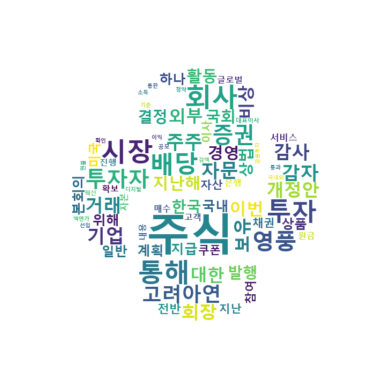

In [16]:
# 6) 명사의 출현 빈도를 활용하여 wordcloud를 작성한다. 0402 하청빈
# 그전에 좀 다듬기 1글자 단어 제외, 최소 50번 이상의 빈도로 등장하는 단어만
filtered_dict = {k:v for k,v in filtered_dict.items() if len(k) > 1 and v >50}
print(len(filtered_dict))
print(os.getcwd())

python_logo_mask = np.array(Image.open("python_logo_sh.png"))
font_path = "c:/Windows/Fonts/malgunbd.ttf"
wc = WordCloud(font_path, background_color="white", max_words=1000, mask=python_logo_mask,width=800,height=1000)

sampleImage = wc.generate_from_frequencies(filtered_dict)
# 7) wordcloud 작성시 이미지를 사용하여 모양설정을 한다(예 마네킹 모양) 0402 하청빈
plt.imshow(sampleImage, interpolation="bilinear")

plt.axis("off")
plt.show()